<a href="https://colab.research.google.com/github/cevhersoylemez/DeepLearning/blob/master/Rakam_Tan%C4%B1ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Colab için gerekli kimlik doğrulama adımları`

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 26397 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu2~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu2~ubuntu18.04.1) ...
Please, open the following URL in a web browser: https://accounts.google

### `Kurulum ve Kontroller`

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4936950250728767002, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12638020876134090666
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8039037712451668748
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281553818
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 412031063694580863
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
!pip install -q keras

# `Uygulama Başlangıç`

In [0]:
import keras
import sklearn
from keras.models import Sequential, load_model
from keras.layers import MaxPooling2D, Conv2D, Dense, Dropout, Flatten
from keras.datasets import mnist
from keras import backend as K

import matplotlib.pyplot as plt

In [0]:
(X_train,Y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


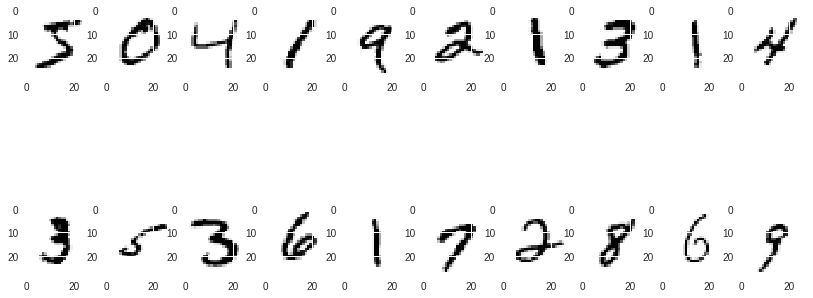

In [0]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(20):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i])
plt.show()

In [0]:
batch_size = 128 #veri setinin paket paket eğitimi için, paketlerinin boyutu
num_classes = 10 #veri seti class sayısı
epochs = 6       #eğitim için veride kaç tur atılacağı 12 de yapılabilir.

img_rows, img_cols = 28, 28 


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Sınıf değerlerini 0 ve 1 arasına indirgemek için, OneHotEncoding kullanıldı.






In [0]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)  
y_test = keras.utils.to_categorical(y_test, num_classes)

# `Model oluşturma`

In [0]:
model = Sequential()

### `Katmanların oluşturulması`

In [0]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2))) # max ortaklama 


model.add(Dropout(0.25))  #nöronların %25ini silecek işlem


model.add(Flatten())  # tam bağlantı katmanı oluşturuldu.


model.add(Dense(128, activation='relu'))  # 128 nörondan oluşan yapay sinir ağı oluşturuldu.

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax')) #sınıf sayısı kadar nöronu olan çıkış katmanı oluşturuldu.

### `Model Görselleştirme`

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

### `Eğitim işlemleri`

In [0]:
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 13s 220us/step - loss: 2.2184 - acc: 0.8088 - val_loss: 0.0838 - val_acc: 0.9737
Epoch 2/6
60000/60000 [==============================] - 10s 160us/step - loss: 0.1129 - acc: 0.9679 - val_loss: 0.0582 - val_acc: 0.9825
Epoch 3/6
60000/60000 [==============================] - 10s 160us/step - loss: 0.0835 - acc: 0.9763 - val_loss: 0.0429 - val_acc: 0.9865
Epoch 4/6
60000/60000 [==============================] - 10s 160us/step - loss: 0.0671 - acc: 0.9807 - val_loss: 0.0323 - val_acc: 0.9880
Epoch 5/6
60000/60000 [==============================] - 9s 158us/step - loss: 0.0587 - acc: 0.9832 - val_loss: 0.0430 - val_acc: 0.9860
Epoch 6/6
60000/60000 [==============================] - 9s 158us/step - loss: 0.0499 - acc: 0.9856 - val_loss: 0.0404 - val_acc: 0.9887


In [0]:
model.save('mnist_model.h5')

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.04044664634547735
Test Accuracy: 0.9887



## `Rastgele değer için test işlemi`

In [0]:
test_image = x_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

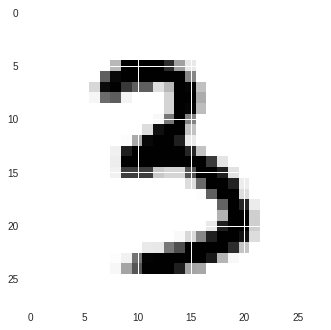

In [0]:
plt.imshow(test_image.reshape(28,28))

In [0]:
test_data = x_test[32].reshape(1,28,28,1)
pred = model.predict(test_data, batch_size=1)
print(pred)

[[2.7849026e-13 1.4274966e-12 1.1279738e-10 1.0000000e+00 4.6669374e-14
  1.4539868e-08 5.8483275e-14 1.6130590e-11 6.2439783e-11 3.8729997e-10]]
